# `make_regression`을 이용한 PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learn에서는 `make_regression` 함수를 이용하여 회귀분석을 연습하기 위한 데이터셋을 만들 수 있다. 이를 이용해서 Principal Component Regression을 연습하는 과제를 진행해보자.



# 패키지 불러오기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Q1 `make_regression` 함수로 데이터 생성해보자

독립변수는 X1부터 X10까지, 종속변수는 Y를 생성하자. 표본 크기는 1000으로 설정하고, `noise`, `random_state`, `bias`등의 변수는 자유롭게 설정해보자.

In [ ]:
# make_regression로 데이터 생성
X, Y = make_regression(n_samples = 1000, n_features = 10, noise = 15, random_state = 42, bias = 5)

# 독립변수 이름을 X1 ~ X10으로 설정
X = pd.DataFrame(X, columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'])

# Y도 데이터프레임 형태로 변환
Y = pd.DataFrame(Y, columns = ['Y'])

# X와 Y를 결합해서 하나의 데이터프레임 df로 생성
df = pd.concat([X, Y], axis = 1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-52.145468
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,94.121816
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-99.015494
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,60.708771
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,156.783618
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.197338,-0.054894,-0.194908,-0.151273,0.521122,0.285554,1.133770,0.645216,0.089581,0.555604,111.603027
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-57.422397
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-25.363397
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-14.310398


# Q2 EDA를 해보자

각 변수별 히스토그램, scatterplot matrix, correlation matrix, 요약통계량(descriptive statistics)를 그려보자


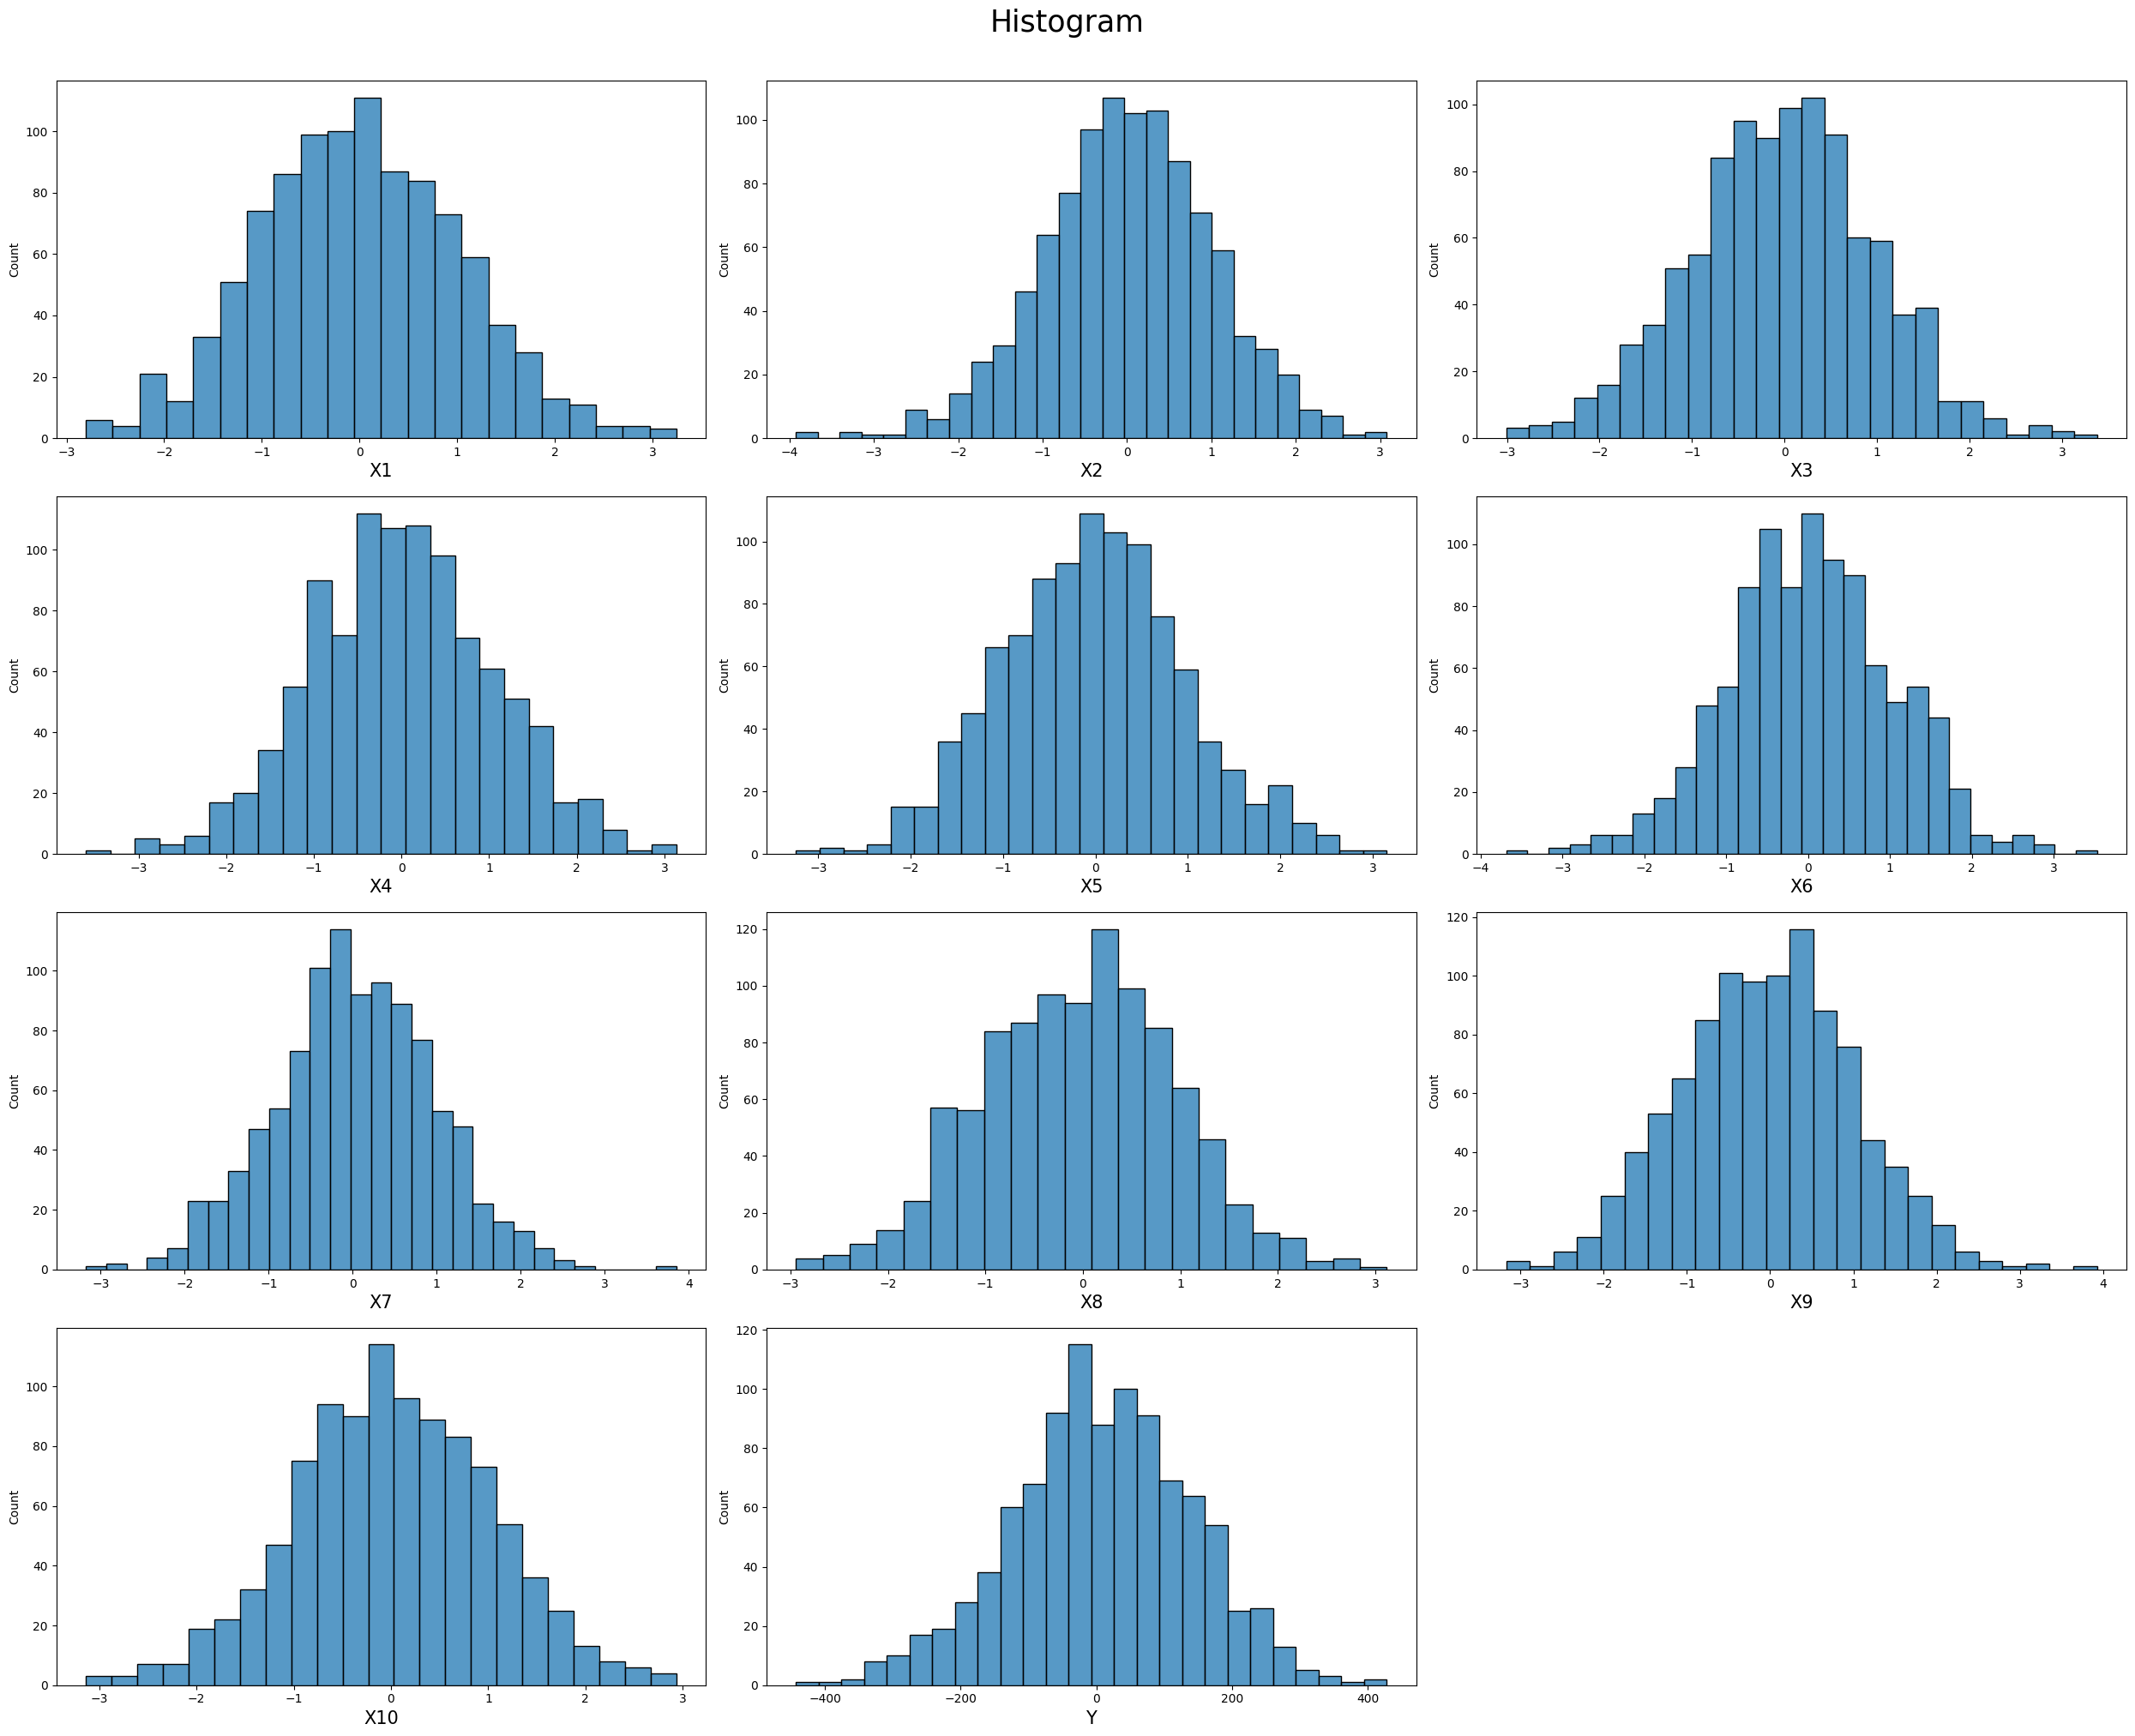

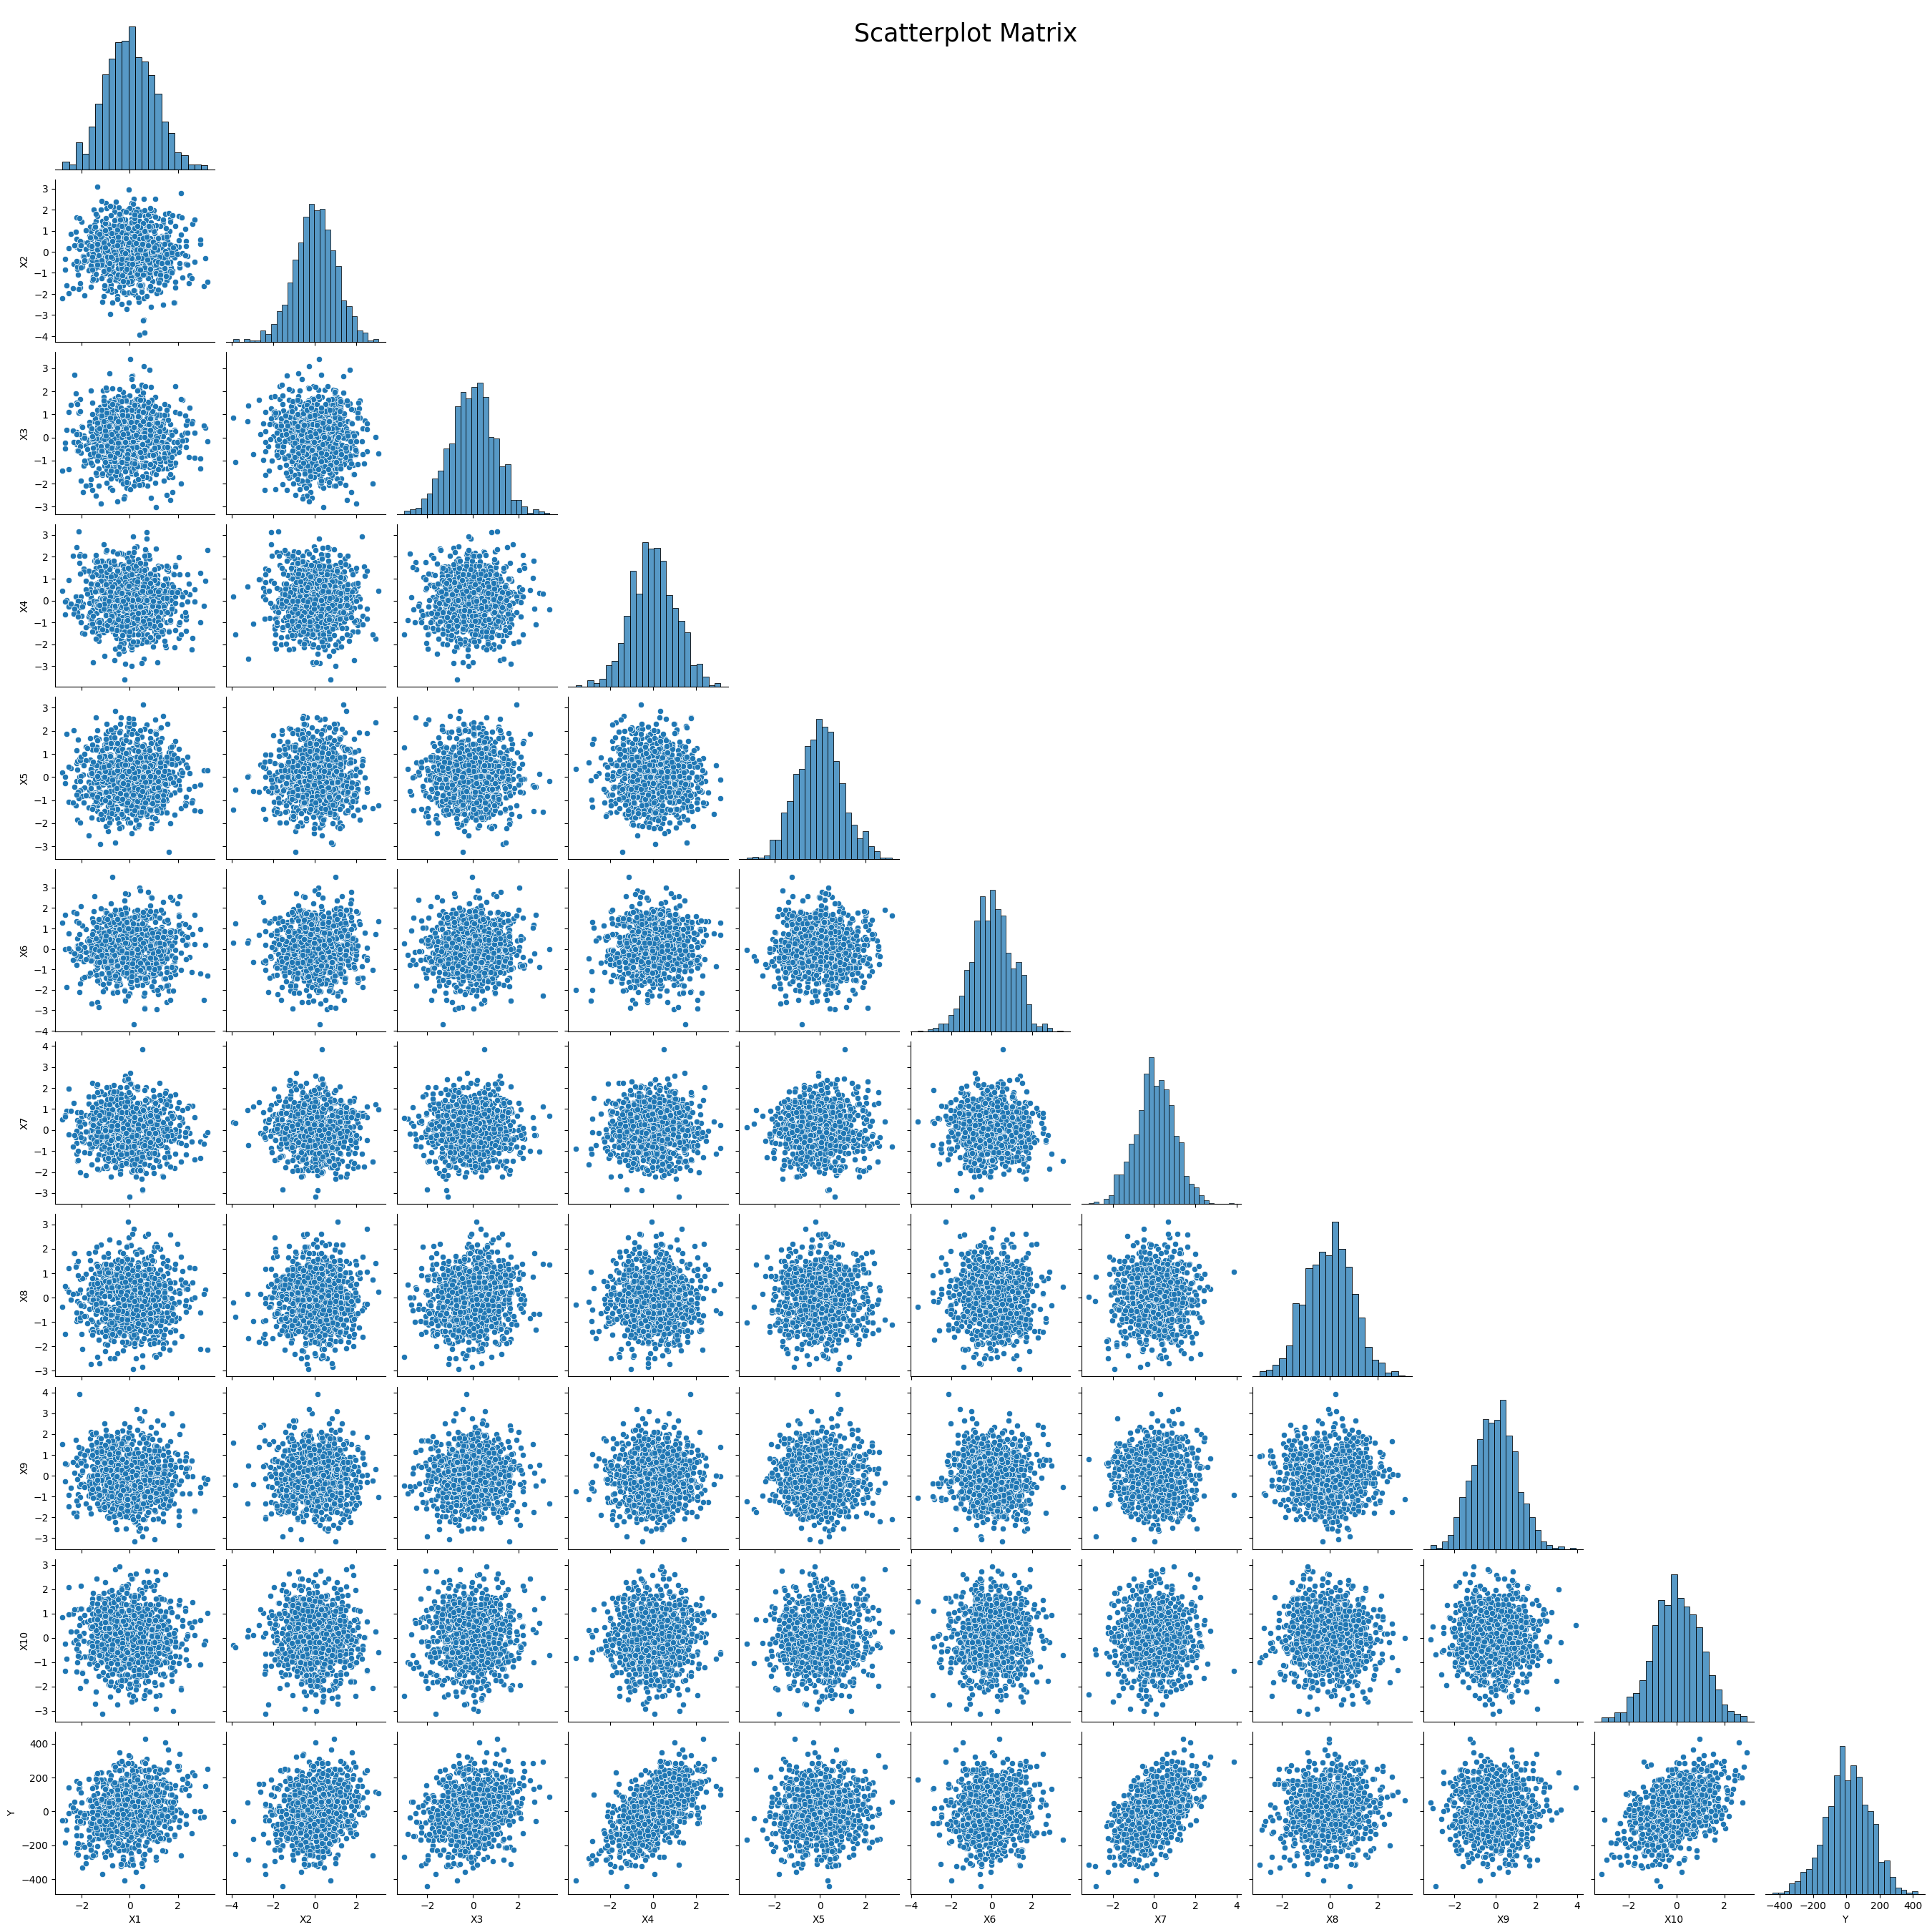

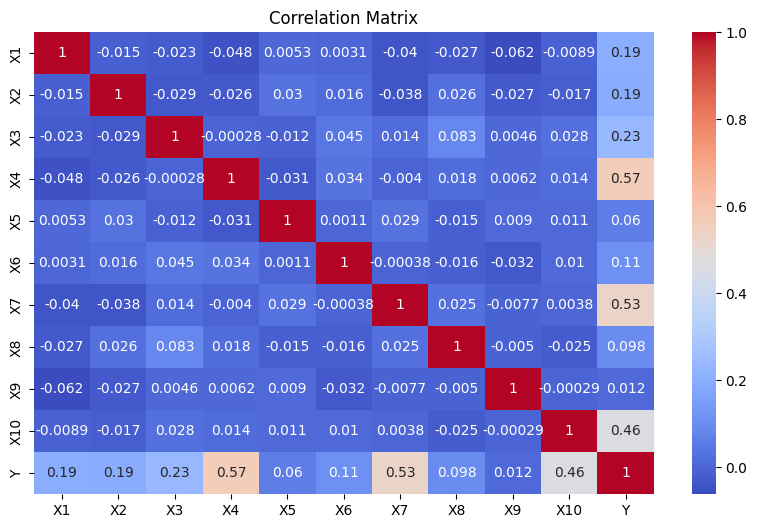

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.002689,0.010788,-0.023104,0.005495,-0.022542,0.031292,0.038105,-0.043075,-0.029252,0.013622,7.721240
std,1.031230,1.005433,0.986846,1.030962,0.983366,1.016046,0.945284,0.983406,1.037024,1.012645,132.370053
min,-2.801912,-3.922400,-3.007632,-3.601085,-3.241267,-3.688365,-3.176704,-2.943142,-3.170426,-3.138515,-442.629419
25%,-0.744779,-0.616527,-0.650034,-0.713176,-0.702626,-0.631506,-0.559290,-0.750008,-0.749592,-0.651541,-75.474981
50%,-0.024976,0.014006,-0.003221,-0.013284,-0.015036,0.007605,0.019097,-0.001346,-0.012086,-0.012020,5.123947
75%,0.683319,0.679698,0.608861,0.696602,0.613766,0.685621,0.687027,0.638310,0.680087,0.721896,95.789341
max,3.243093,3.076860,3.377383,3.137749,3.152057,3.529055,3.852731,3.117681,3.926238,2.935658,427.930638


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 - 반복문을 활용해 변수별 서브플롯 생성 - 모든 변수들이 정규분포와 유사한 형태를 보이고 있음을 확인할 수 있다.
plt.figure(figsize = (25, 20))
plotnumber = 1
for col in df:
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col, fontsize = 15)
    plotnumber += 1
plt.suptitle("Histogram", fontsize = 25, y = 1.01)
plt.tight_layout()
plt.show()

# Scatterplot matrix - 몇몇 변수쌍들을 제외하고는 눈에 띄는 상관관계가 없어 보인다.
sns.pairplot(df, corner = True)
plt.suptitle("Scatterplot Matrix", fontsize = 25)
plt.show()

# Correlation matrix - Y와 X4(0.57), Y와 X7(0.53), Y와 X10(0.46) 간에만 상대적으로 유의미한 중간 정도의 상관관계가 보인다.
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 요약 통계량
df.describe()

# Q3 `StandardScaler` 로 scaling을 해보자

X 변수들에 대해 `StandarScaler`를 이용하여 표준화를 해보자.
PCA를 하기 전에 스케일링을 한다는 점을 유의하자.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링하기
scaler = StandardScaler()
df.iloc[:, 0:10] = scaler.fit_transform(df.iloc[:, 0:10]) # .iloc을 이용해서 0번째 ~ 9번째 열만 선택해 X 변수들에 대해 표준화 진행
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1.531525,0.876753,-0.713406,-0.051720,-0.645549,-1.127075,-0.969212,1.055670,-0.260919,-0.766083,-52.145468
1,0.522111,1.249713,-1.781078,1.167955,-0.092196,-0.987018,1.086001,-0.521101,0.743433,-0.989138,94.121816
2,-0.663220,0.145622,0.171278,-1.395674,-0.655534,0.142681,0.579158,0.245181,-0.361899,-0.613645,-99.015494
3,0.900318,0.383237,0.709138,0.158335,1.624510,-0.146193,-0.080219,-0.308096,0.892468,-0.840796,60.708771
4,-0.539658,1.057630,1.610608,0.360733,0.158221,-1.041623,-0.109921,-0.668467,-1.441319,1.167256,156.783618
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.188849,-0.065359,-0.174182,-0.152137,0.553137,0.250371,1.159666,0.700255,0.114647,0.535483,111.603027
996,-0.955819,1.578827,0.110120,0.696342,-0.643244,0.604012,-1.856258,-0.475660,0.337849,0.065499,-57.422397
997,0.417818,-0.840244,1.685360,1.666830,-0.786905,-0.700300,-2.075416,0.239049,-0.507507,-0.172092,-25.363397
998,-0.262964,-1.384561,0.175091,-0.019182,-0.239175,-0.460296,0.063211,-0.027020,-0.631335,0.667441,-14.310398


# Q4 `PCA`를 해보자

`PCA` 함수를 이용하여 PCA를 해보자. 또 다음을 해보자.

- PC1 부터 PC10 까지 Scree plot을 그려보자
- PC1과 PC2를 가지고 scatterplot을 그려보자.

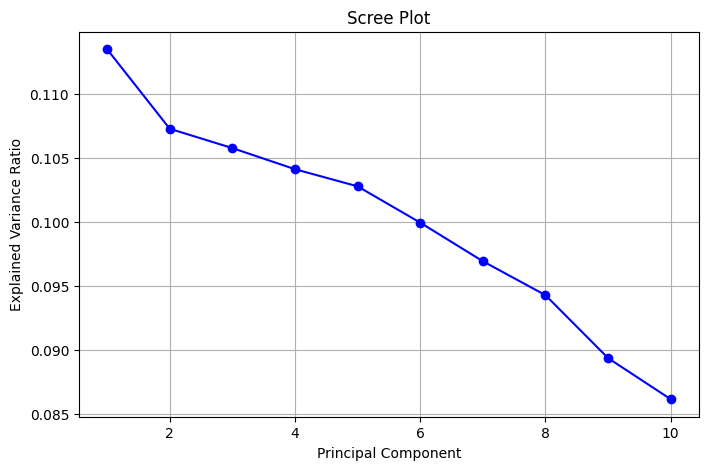

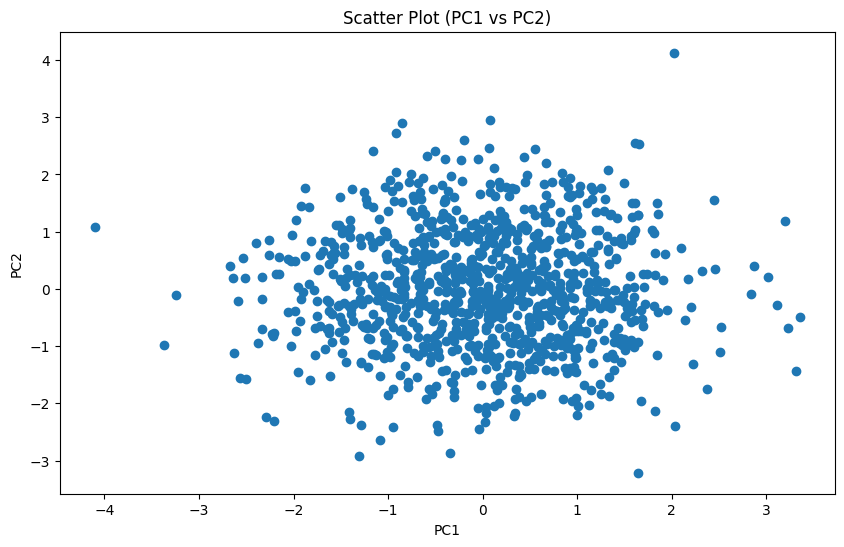

In [ ]:
from sklearn.decomposition import PCA

# PCA 계산하기
pca = PCA(n_components = 10) # PCA 모델 생성 / 전체 독립변수 개수만큼 주성분의 개수 설정
principal_coponents = pca.fit_transform(df.iloc[:, 0:10]) # pca.fit_transform을 이용해서 PCA 변환 수행 - 기존 독립변수들이 데이터의 분산을 가장 많이 설명할 수 있는 새로운 축인 주성분으로 변환됨

# Scree plot 그리기 - Scree plot을 이용해 몇 개의 주성분을 사용할지 결정
plt.figure(figsize = (8, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker = 'o', color = 'b') # pca.explained_variance_ratio_는 각 주성분이 원본 데이터의 분산을 얼마나 잘 설명하는지에 대한 비율을 나타냄
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid()
plt.show()
# Scree plot의 x=2 지점에서 비교적 급격한 감소가 확인됨. 이는 두 번째 주성분까지가 데이터의 분산을 설명하는데 중요한 역할을 함을 의미함.
# 그러나 Scree plot를 보면 특정 지점에서의 급격한 감소보다는 대체로 일정하게 감소하는 형태를 보이고 있는데, 이는 주성분들이 비슷한 수준의 중요성을 가진다는 것을 의미할 수도 있음.

# PC1 와 PC2 산점도 그리기
df_pca = pd.DataFrame(principal_coponents, columns = [f'PC{i+1}' for i in range(10)]) # PCA 변환된 데이터프레임 생성
df_pca.head() # PC1 방향으로 데이터가 정렬되어 있으며, PC1이 가장 많은 정보를 포함한 주성분

plt.figure(figsize = (10, 6))
plt.scatter(x = df_pca['PC1'], y = df_pca['PC2'])
plt.title('Scatter Plot (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# PC1과 PC2의 산점도가 하나의 군집으로 모여있음 - 이 두 개의 주성분으로 전체 데이터가 잘 설명된다는 것을 의미함

# Q5 `train_test_split`을 해보자

Train set과 Test set을 6:4 비율로 나눠보자

In [ ]:
from sklearn.model_selection import train_test_split

# train set과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:10], df['Y'], test_size = 0.4, random_state = 42)

#  Q6 Principal Component Regression을 진행해보자.

Q5에서 만든 데이터로부터 다음의 과정으로 문제를 풀어보자.
- Y를 종속변수(`y_train`), `X_train`의 PC1을 종속변수로 하여 Linear Regression을 적합한다.
- `y_pred`과 `y_train`을 비교하여 train error의 MSE를 구한다.
- Principal component을 하나 늘려 Linear regression을 적합한다. 즉 Y에 대해 PC1, PC2으로 Linear Regression을 적합한다.
- 마찬가지로 train error의 MSE를 구한다.
- PC10까지 같은 과정을 반복하고, MSE를 비교한다.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train MSE 저장
mse_train = []

# train 데이터 PCA 변환
pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train)

# 회귀모형 적합
for i in range(1, 11):
  model = LinearRegression()
  model.fit(X_train_pca[:, 0:i], y_train)

  y_pred = model.predict(X_train_pca[:, 0:i]) # train 데이터를 이용한 예측값 생성
  mse_train.append(mean_squared_error(y_train, y_pred)) # train error의 MSE 계산 후, train MSE 배열에 추가

mse_train

[16273.746562150747,
 15902.552716986364,
 13845.430103794675,
 13845.374423022908,
 11449.530525929242,
 10796.118269196,
 9630.377404458233,
 9616.335177507077,
 3024.0421267762817,
 205.7583954260037]

# Q7 Test error을 계산해보자.

위 과정에서 적합한 모형을 바탕으로 `y_test`을 추정하고 `y_test`와의 MSE를 계산하여 test error을 구해보자.

In [ ]:
# test MSE 저장
mse_test = []

# train 데이터로 학습한 PCA 변환을 test 데이터에 동일하게 적용
X_test_pca = pca.transform(X_test)

# 위 단계에서와 동일하게 회귀모형 적합
for i in range(1, 11):
  model = LinearRegression()
  model.fit(X_train_pca[:, 0:i], y_train)

  y_pred = model.predict(X_test_pca[:, 0:i]) # test 데이터를 이용한 예측값 생성
  mse_test.append(mean_squared_error(y_test, y_pred)) # test error의 MSE 계산 후, test MSE 배열에 추가

mse_test

# 주성분의 개수가 늘어날수록 MSE가 급격하게 감소함

[16180.434218108463,
 15868.705027491902,
 13094.092280637833,
 13092.025206342974,
 10839.122377382932,
 10346.162173245097,
 9525.310056375454,
 9533.08002642186,
 3102.0664004275195,
 223.3059346805721]

# Bonus: MNIST 데이터로 PCA와 T-SNE 시각화 비교

데이터 로드

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # mnist.load_data()를 이용해 MNIST 데이터셋을 불러옴. x는 이미지 픽셀 값(28*28 크기의 이미지), y는 0~9까지의 숫자 중 하나인 레이블.
x_train = x_train.astype('float32') / 255 # 데이터 정규화(float32 타입으로 변환 후 255로 나눔) -> 신경망 학습은 일반적으로 작은 숫자로 입력을 받을 때 더 안정적. 따라서 0~1 범위로 조정.
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # x_train과 x_test는 원래 각각 (60000, 28, 28)과 (10000, 28, 28)의 3차원
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))     # 신경망 모델에 입력하기 위해 각각 (60000, 28*28), (10000, 28*28) 형태로 변환하여 각 이미지를 784개의 숫자로 펼침
print(x_train.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)


이미지로 보여주는 함수 정의 (가로로 10개의 이미지가 하나의 군집)

In [6]:
import matplotlib.pyplot as plt

# 가로로 10개의 이미지가 하나의 군집
def viz_img(y_pred):    # y_pred에는 특정 이미지로 클러스터링된 결과가 들어 있는 배열.
    n = 10              # 각 군집별 선택할 이미지의 개수(여기서는 10개)
    fig = plt.figure(1) # 캔버스 생성
    box_index = 1       # 서브플롯의 번호(1부터 시작해서 반복문 안에서 증가)
    for cluster in range(10):
        result = np.where(y_pred == cluster)    # y_pred에서 현재 cluster 값에 해당하는 이미지의 인덱스를 result에 저장
        for i in np.random.choice(result[0].tolist(), n, replace=False):  # .tolist()를 이용해서 result를 배열에서 리스트 형식으로 변환 -> np.random.choice()를 이용해서 result 배열 안에서 중복 없이 n개의 인덱스를 선택(현재 cluster에 속하는 데이터 n개가 선택됨)
            ax = fig.add_subplot(n, n, box_index)   # 10*10 그리드의 box_index 위치에 이미지 추가
            plt.imshow(x_train[i].reshape(28, 28))  # plt.imshow()를 이용해서 x_train의 인덱스 i 값을 28*28 형태로 변환한 이미지를 출력
            plt.gray()  # 회색조로 출력
            ax.get_xaxis().set_visible(False)   # 그래프에 x축과 y축의 숫자가 안 보이도록 함(축 숨기기)
            ax.get_yaxis().set_visible(False)
            box_index += 1    # box_index 증가 -> i는 총 10개(n개)의 값을 가지므로, '하나의 행'은 '동일한 cluster'로 예측된 x_train 데이터들임
    plt.show()

# 0~9까지 10개의 군집에 대해(for cluster in range(10)),
# 각각 10개씩 무작위 이미지(총 10*10 = 100개)를 선택하여(for i in np.random.choice(result[0].tolist(), n, replace=False))
# 10*10 배열의 이미지로 시각화 (fig.add_subplot(n, n, box_index), plt.imshow(x_train[i].reshape(28, 28)))

### PCA

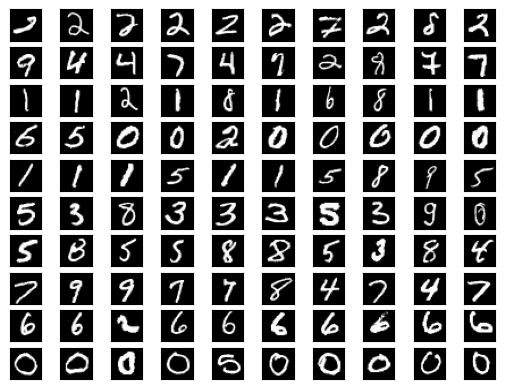

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30).fit(x_train) # 기존 x_train은 784차원의 고차원 데이터인데, 이를 30차원으로 축소하는 PCA 모델을 만들고 .fit(x_train)으로 x_train을 이용해 학습하여 주성분을 찾음
reduced_X = pca.transform(x_train)      # 학습된 PCA를 이용해 x_train에 대해 PCA 변환 수행(reduced_X는 30차원의 저차원 데이터)

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

model = KMeans(init='k-means++', n_clusters=10) # init: 초기 클러스터 중심을 초기화하는 파라미터. 'k-means++'는 첫 번째 중심을 무작위 선택하고, 이후에는 데이터 포인트와의 거리를 고려해서 중심을 선택(기본값에 해당)
                                                # n_clusters는 클러스터의 개수를 지정 -> 주어진 이미지를 10개의 군집으로 분류하겠다는 의미
model.fit(reduced_X)                            # KMeans 모델을 이용해 PCA로 차원 축소된 데이터 reduced_X를 학습하고, 각 군집의 중심을 반복적으로 계산하며 각 샘플을 10개의 군집 중 하나로 분류
y_pred = model.labels_                          # .labels_는 각 데이터 포인트가 속하는 군집의 인덱스

viz_img(y_pred)
# 위에서 정의한 함수를 이용해 각 예측 클래스에 속하는 이미지를 무작위로 10개씩 선택해 시각화
# 같은 행에 있는 이미지는 같은 label로 클러스터링된 이미지 데이터 - 실제 정답과 일치하지 않는 경우들이 보임

시각화를 위해 주성분 개수를 2개로 설정한 후 시각화를 진행해보세요.

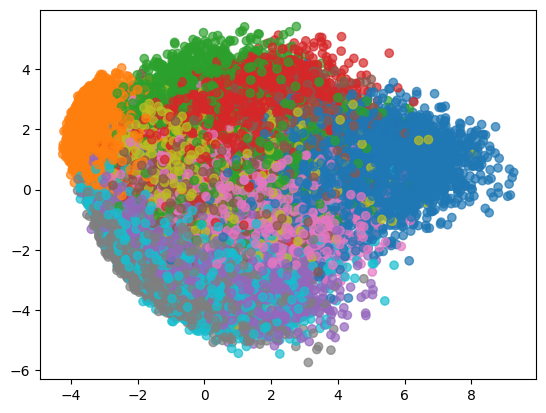

In [9]:
pca = PCA(n_components = 2).fit(x_train)
reduced_X = pca.transform(x_train)  # 2개의 주성분을 가진 데이터로 변환됨
# 데이터프레임 생성
df = pd.DataFrame({'Column1': reduced_X[:,0], 'Column2': reduced_X[:,1]}) # Column1 = reduced_X[:,0] = 첫 번째 주성분 값들, Column2 = reduced_X[:,1] = 두 번째 주성분 값들
df['y_train'] = pd.Series(y_train, index=df.index)  # 각 데이터 포인트의 실제 레이블인 y_train을 df의 새로운 열로 추가(시각화를 위함)

plt.scatter(df['Column1'], df['Column2'], c=df['y_train'], cmap='tab10', alpha=0.7) # 주성분1과 주성분2를 각각 x축과 y축 값으로 이용해 산점도를 그리고, 레이블에 따라 색을 다르게 지정 -> 각 군집을 시각적으로 구분 가능해짐
plt.show()
# 각 데이터가 속하는 클래스별 분포를 시각적으로 확인할 수 있음

### T-SNE (그냥 실행해주세요!)

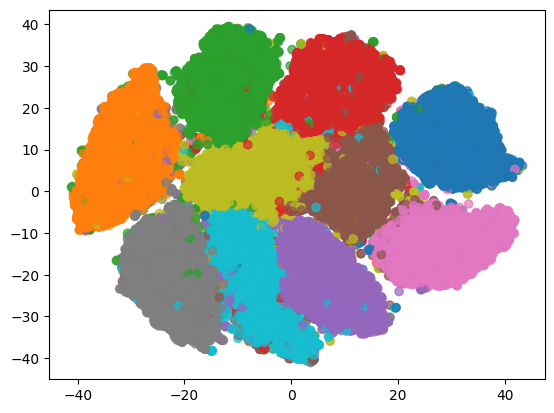

In [10]:
from sklearn.manifold import TSNE   # t-SNE: '비선형' 차원 축소 기법

model = TSNE(n_components=2, learning_rate=100) # 시각화를 위해 데이터를 2차원으로 축소하는 TSNE 모델
transformed = model.fit_transform(x_train) # 좀 오래걸림(30분)  # 위의 t-SNE 모델을 학습하고 x_train을 2차원으로 변환

# 2개의 주성분 값과 실제 레이블을 합친 데이터프레임 생성
dataset = pd.DataFrame({'Column1': transformed[:,0], 'Column2': transformed[:,1]})
dataset['y_train'] = pd.Series(y_train, index=dataset.index)

plt.scatter(dataset['Column1'], dataset['Column2'], c=dataset['y_train'], cmap='tab10', alpha=0.7)
plt.show()
# 각 데이터가 속하는 클래스별 분포를 시각적으로 확인할 수 있음
# t-SNE는 PCA에 비해 비선형적인 관계를 잘 포착하기 때문에 군집 간의 경계가 더 뚜렷하여 명확하게 구분됨.